In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from scipy.optimize import curve_fit
warnings.filterwarnings("ignore")

In [2]:
datacsv = pd.read_csv('M32_triphenylene_standard.csv')
df = pd.DataFrame(data = datacsv)
df

,0,0.1
0,5,37
1,10,43
2,30,61
3,60,64
4,120,68


In [4]:
X = df.iloc[:,0].values  # 説明変数
y = df.iloc[:,1].values   # 目的変数

def exp_func(t, a, b):
    return 100*a*(1-(np.exp(-b*t)))

popt, pcov = curve_fit(exp_func, X, y)
popt

array([0.64415772, 0.13534626])

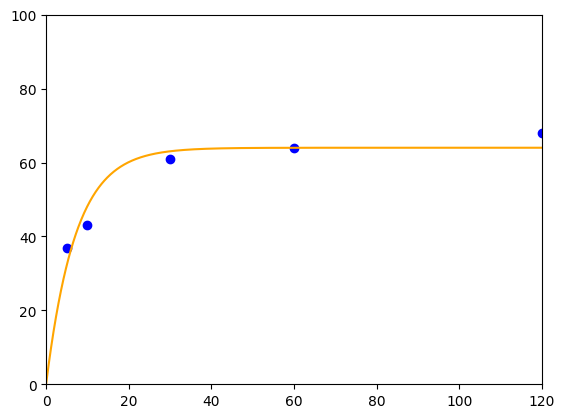

In [5]:
# Plot
plt.scatter(X, y, label='blue', color='blue')
#近似曲線
X_reg = np.arange(0, 125, 0.1)
y_reg = 100*0.64*(1-(np.exp(-0.14*X_reg)))
plt.plot(X_reg, y_reg, color='orange')
plt.xlim(0, 120)
plt.ylim(0, 100)
plt.savefig('M32.png', dpi=200)

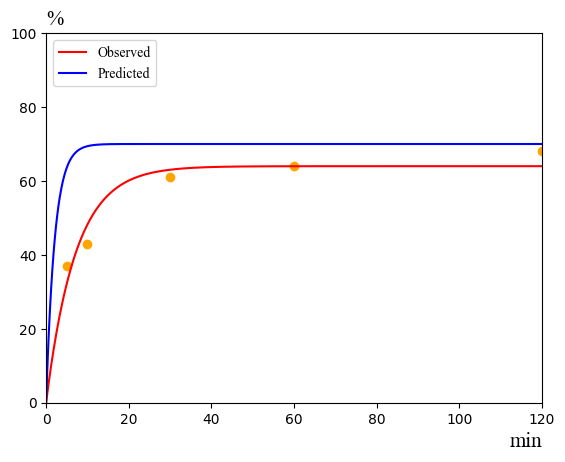

In [6]:
# Plot
#近似曲線
X_reg = np.arange(0, 125, 0.1)
y_reg = 100*0.64*(1-(np.exp(-0.14*X_reg)))
plt.plot(X_reg, y_reg, color='red', label="Observed")
plt.scatter(X, y, color='orange')
plt.title("%", loc = "left", fontname="times new roman", fontsize=15)
X_reg2 = np.arange(0, 125, 0.1)
y_reg2 = 100*0.70*(1-(np.exp(-0.47830584*X_reg)))
plt.plot(X_reg2, y_reg2, color='blue', label="Predicted")

plt.xlim(0, 120)
plt.ylim(0, 100)

plt.xlabel('min', loc='right', fontname="times new roman", fontsize=15)
plt.legend(loc='upper left', prop = {"family" : "times new roman"})
plt.savefig('M32_vs.png', dpi=200)